# Interview Preparation
# Linear Regression

## Agenda

1. Introducing the bikeshare dataset
    - Reading in the data
2. Exploratory Data analysis
    - Explore data
    - Identify input and output features
3. Build the model
    - Choose the Algorithm
    - Build a model using training data
    - Evaluate the model on test data
4. Benchmark the model
    - Calculate Null Error
    - Evaluate the model against null error
    - Check for overfitting
5. Improve the model
    - Create a new feature
    - Evaluate the model with the new feature as input
    - Verify if the improvement is above 10%

<h1>Bike Sharing Demand</h1>

<h2>Forecast use of a city bikeshare system</h2>
<p/>
You are provided hourly rental data spanning two years. You must <b>predict the <u>total count of bikes rented</u> during each hour</b> covered by the test set, using only information available prior to the rental period.
<p/>
<b>Data Fields</b>
<br/>
datetime - hourly date + timestamp<br/>
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br/>
holiday - whether the day is considered a holiday<br/>
workingday - whether the day is neither a weekend nor holiday<br/>
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
temp - temperature in Celsius<br/>
atemp - "feels like" temperature in Celsius<br/>
humidity - relative humidity<br/>
windspeed - wind speed<br/>
casual - number of non-registered user rentals initiated<br/>
registered - number of registered user rentals initiated<br/>
count - number of total rentals<br/>

## Reading in the data

We'll be working with a dataset from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).

In [111]:
# read the data and set the datetime as the index
import pandas as pd
url = 'https://raw.githubusercontent.com/upxacademy/ML_with_Python/master/Datasets/bikeshare.csv?token=AYxzdiGnjM610dBT7PuwUnUNOmm3bGcvks5ZFDyLwA%3D%3D'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [112]:
# "count" is a method, so it's best to name that column something else
bikes.rename(columns={'count':'total'}, inplace=True)

# Exploratory Data Analysis

In [113]:
# Placeholder for any queries
#bikes.dtypes
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


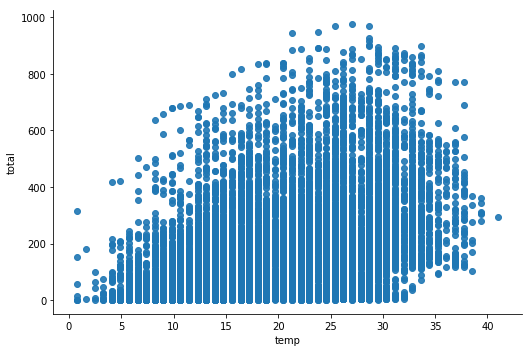

In [115]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', fit_reg=False, data=bikes, aspect=1.5, scatter_kws={'alpha':0.9})

# Build the model

Split the data into training and test data and apply linear regression

In [117]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
# define a function that accepts a list of features and returns testing RMSE
def train_test_eval(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Calculate the rmse for the model when 'temp' is the input feature selected

In [118]:
base_model_performance = train_test_rmse(['temp'])
base_model_performance

164.63700779531732

## Benchmark the model

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which you may want to measure your regression model.

In [119]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([190.7325496, 190.7325496, 190.7325496, ..., 190.7325496,
       190.7325496, 190.7325496])

In [120]:
# compute null RMSE
null_error = np.sqrt(metrics.mean_squared_error(y_test, y_null))
null_error

180.44820035417416

In [121]:
if base_model_performance < null_error:
   print ('Your model is better than random prediction')
else:
   print ('Uh..oh.Your model is worse than random predictions')


Your model is better than random prediction


# Check if the model is overfitted

In [122]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
y_train_pred = linreg.predict(X_train)

In [124]:
training_accuracy = np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

A good rule of thumb is that the difference between the RMSE values on training and testing data should not be more than 20

In [125]:
if ((training_accuracy - base_model_performance) <= 20):
    print ("There is no overfitting")
else:
    print ("Your model seems to be overfitted")

There is no overfitting


# Improve the model

## Feature engineering

See if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **daytime:** as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

Then, try using each of the three features (on its own) with `train_test_rmse` to see which one performs the best!

In [126]:
# hour as a numeric feature
bikes['hour'] = bikes.index.hour

In [127]:
# daytime as a categorical feature
bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)
bikes.head(25)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour,daytime
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,0
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,0
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,0
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,0
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,0
2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,0
2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,1
2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,1


Check if the new model performance got improved with the input feature as 'daytime'

In [128]:
new_model_performance = train_test_rmse(['daytime'])

In [129]:
val = ((base_model_performance - new_model_performance)/base_model_performance)*100

In [130]:
if val>10:
    print ("Congratulations! You have improved the model by more than 10%")
else:
    print ("Try again")

Congratulations!You have improved the model by more than 10%
